<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/CNN_CiFar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.layers import Dense
from IPython.core.pylabtools import figsize
from keras import metrics
from keras.callbacks import EarlyStopping 
from sklearn.preprocessing import scale
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import StandardScaler
import sklearn
from keras.layers import Dense, Activation, Dropout,Flatten, Conv2D
from tensorflow.keras.utils import to_categorical 
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from keras.datasets import cifar10

In [9]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_pre = x_test
x_train = x_train.reshape(50000, 32,32,3)
x_test = x_test.reshape(10000, 32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
y_train = np_utils.to_categorical(y_train, 10)  
y_test = np_utils.to_categorical(y_test, 10) 

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3 )))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

In [15]:
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 128)       

In [16]:
model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=12, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/12
391/391 [==============================] - 127s 322ms/step - loss: 1.9906 - accuracy: 0.2875 - val_loss: 1.7593 - val_accuracy: 0.3714
Epoch 2/12
391/391 [==============================] - 120s 308ms/step - loss: 1.6762 - accuracy: 0.4029 - val_loss: 1.5520 - val_accuracy: 0.4459
Epoch 3/12
391/391 [==============================] - 121s 308ms/step - loss: 1.5299 - accuracy: 0.4544 - val_loss: 1.4345 - val_accuracy: 0.4774
Epoch 4/12
391/391 [==============================] - 120s 306ms/step - loss: 1.4324 - accuracy: 0.4890 - val_loss: 1.4119 - val_accuracy: 0.5039
Epoch 5/12
391/391 [==============================] - 119s 304ms/step - loss: 1.3544 - accuracy: 0.5160 - val_loss: 1.3182 - val_accuracy: 0.5291
Epoch 6/12
391/391 [==============================] - 119s 304ms/step - loss: 1.2907 - accuracy: 0.5410 - val_loss: 1.2583 - val_accuracy: 0.5483
Epoch 7/12
391/391 [==============================] - 119s 305ms/step - loss: 1.2335 - accuracy: 0.5602 - val_loss: 1.2420 -

In [17]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.0887 - accuracy: 0.6090
Test score: 1.088674545288086
Test accuracy: 0.609000027179718


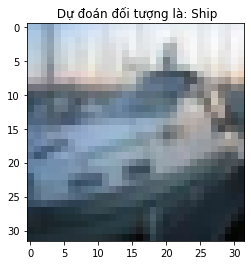

In [23]:
Label = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

test = 2
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))

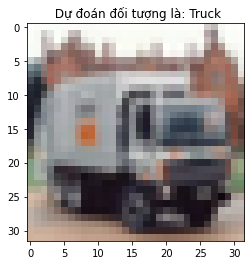

In [24]:
test = 11
plt.title(" Dự đoán đối tượng là: " + str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,32,32,3)))]))
plt.imshow(x_pre[test], cmap=plt.get_cmap('gray'))